# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Describe the Columns

Target variable
    * W = No of Wins
    
Feature variables    
    * R = Runs
    * AB = At Bats
    * H = Hits
    * 2B = Doubles
    * 3B = Triples
    * HR = Homeruns
    * BB = Walks
    * SO = Strikeouts
    * SB = Stolen Bases
    * RA = Runs Allowed
    * ER = Earned Runs
    * ERA = Earned Run Average
    * CG = Complete Games
    * SHO = Shutouts
    * SV = Saves
    * E = Errors
        

In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#                                             ANALYSIS     

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


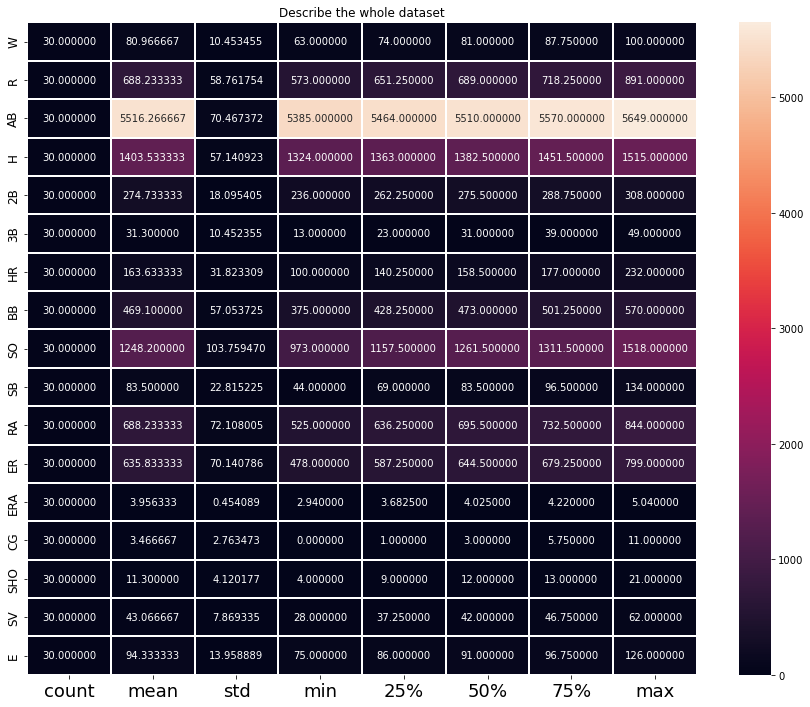

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

Describe the Dataset

    * R :
        mean = 688.23
        std = 58.76
        min = 573.00
        max = 891.00
        
    * AB :
        mean = 5516.26
        std = 70.46
        min = 5385.00
        max = 5649.00
        
    * H :
        mean = 1403.53
        std = 57.14
        min = 1324.00
        max = 1515.00
        
    * 2B :
        mean = 274.73
        std = 18.09
        min = 236.00
        max = 308.00
        
    * 3B :
        mean = 31.00
        std = 10.45
        min = 13.00
        max = 49.00
        
    * HR :
        mean = 163.33
        std = 31.82
        min = 100.00
        max = 232.00
        
    * BB :
        mean = 469.10
        std = 57.03
        min = 375.00
        max = 570.00
        
    * SO :
        mean = 1248.00
        std = 103.75
        min = 973.00
        max = 1518.00
        
    * SB :
        mean = 83.50
        std = 22.81
        min = 44.00
        max = 134.00
    * RA :
        mean = 688.23
        std = 72.10
        min = 525.00
        max = 844.00
        
    * ER :
        mean = 635.83
        std = 70.14
        min = 478.00
        max = 799.00
        
    * ERA : 
        mean = 3.95
        std = 0.45
        min = 2.94
        max = 5.04
        
    * CG : 
        mean = 3.46
        std = 2.76
        min = 0.00
        max = 11.00
        
    * SHO :
        mean = 11.30
        std = 4.12
        min = 4.00
        max = 21.00
        
    * SV :
        mean = 43.06
        std = 7.96
        min = 28.00
        max = 62.00
        
    * E :
        mean = 94.33
        std = 13.95
        min = 75.00
        max = 126.00


                                      VISULAISATION

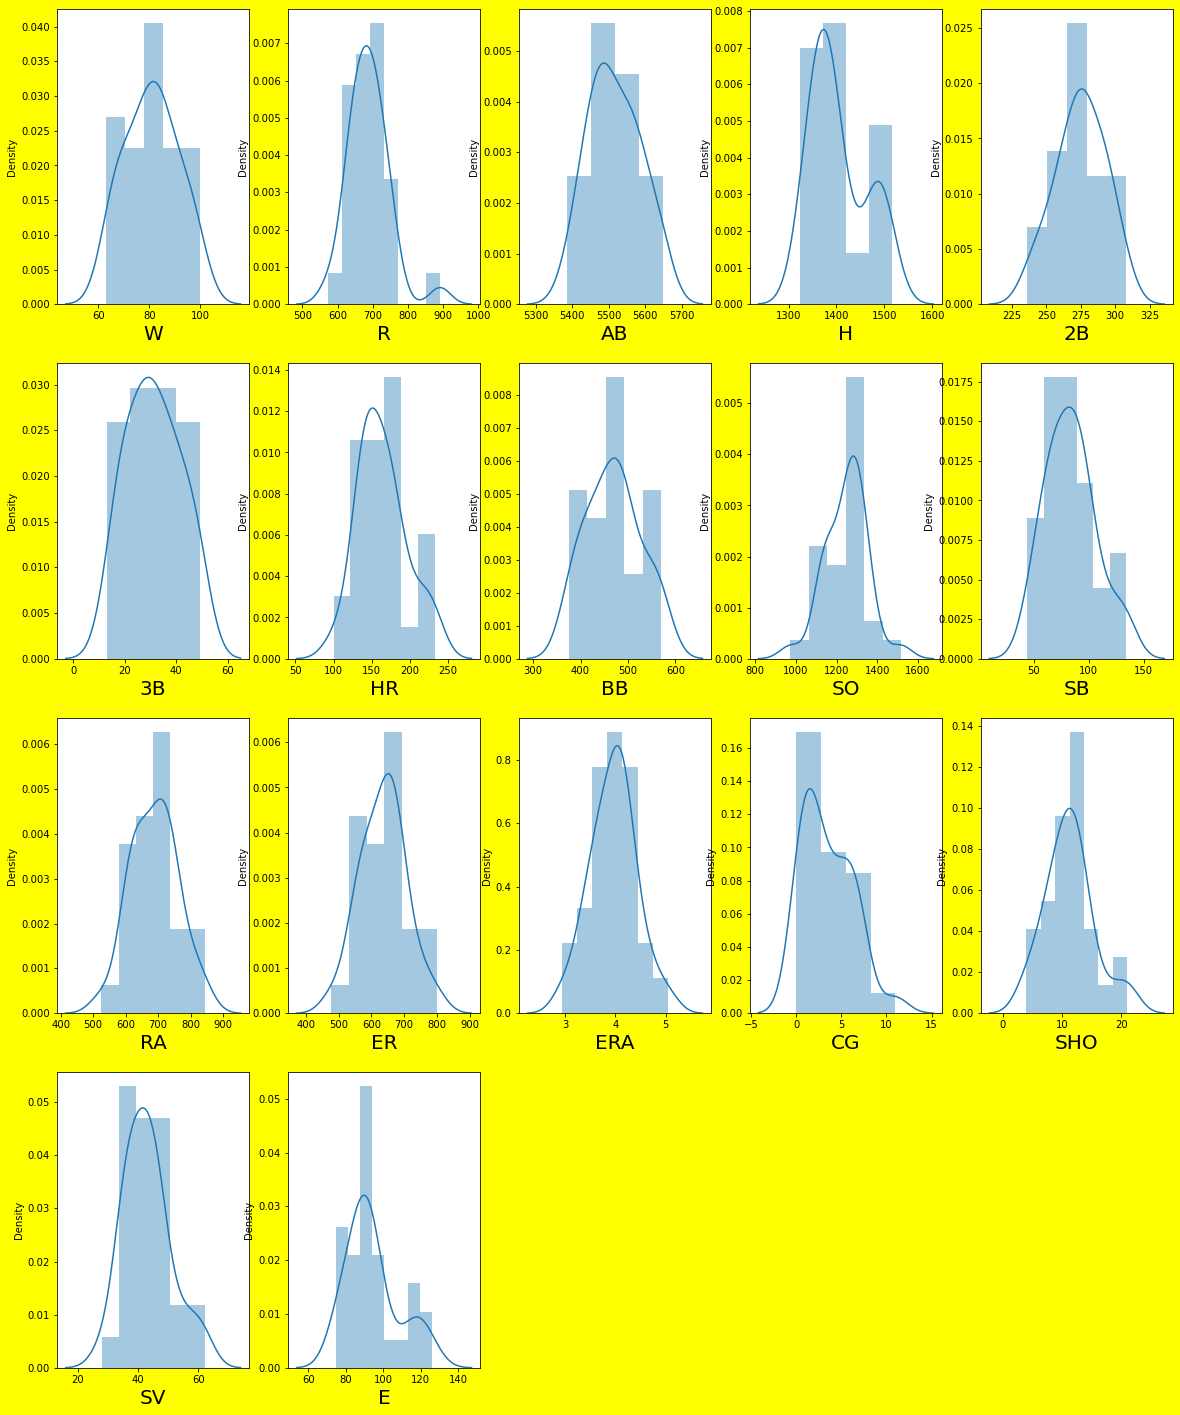

In [9]:
plt.figure(figsize=(20,25),facecolor ='yellow')
num =1

for column in data:
    if num <=17:
        ax = plt.subplot(4,5,num)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

Almost data looks like normally distributed but we can't say without any analysis

                                            CORRELATION

In [10]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

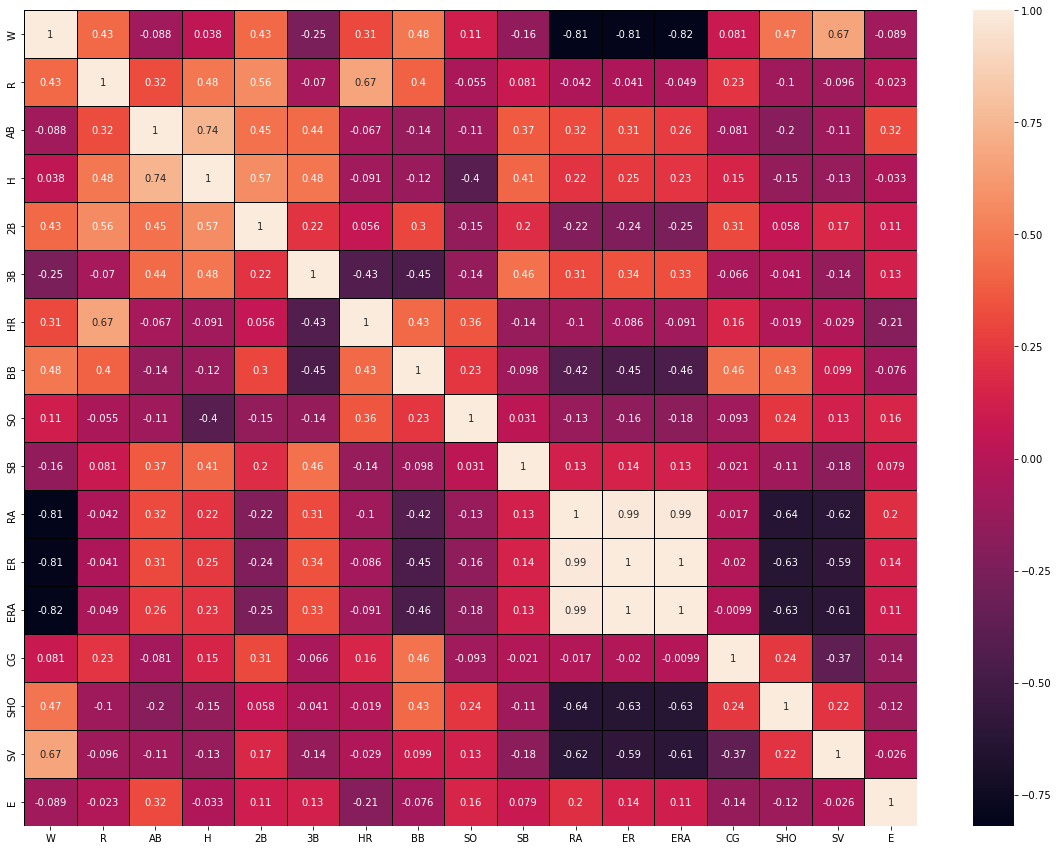

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

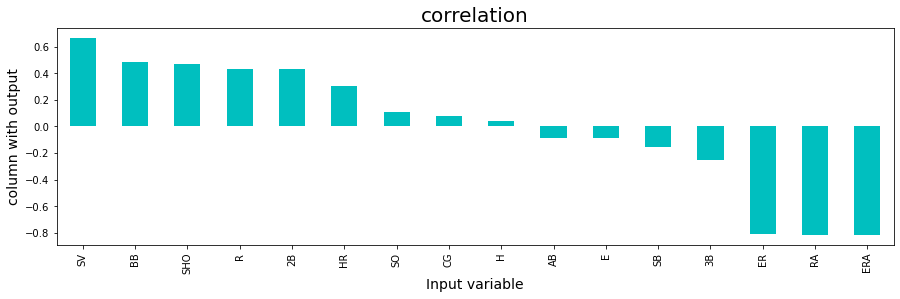

In [12]:
plt.figure(figsize=(15,4))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Input variable',fontsize=14)
plt.ylabel('column with output',fontsize=14)
plt.title("correlation",fontsize=20)
plt.show()

* R, H, 2B, HR, BB, SO, CG, SHO, SV are the columns having positively correlation with the target variable
* AB, 3B, SB, RA, ER, ERA, E are the columns having negatively correlation with the target variable

Correlation of feature variable with the target variable:

    * R has 43% correlation with the target variable which can be considered as strong bond.
    * AB has 8% correlation with the target variable which can be considered as week bond.
    * H has 3% correlation with the target variable which can be considered as week bond.
    * 2B has 43% correlation with the target variable which can be considered as strong bond.
    * 3B has 25% correlation with the target variable which can be considered as good bond.
    * HR has 31% correlation with the target variable which can be considered as good bond.
    * BB has 48% correlation with the target variable which can be considered as strong bond.
    * SO has 11% correlation with the target variable which can be considered as good bond.
    * SB has 16% correlation with the target variable which can be considered as good bond.
    * RA has 81% correlation with the target variable which can be considered as strong bond.
    * ER has 81% correlation with the target variable which can be considered as strong bond.
    * ERA has 82% correlation with the target variable which can be considered as strong bond.
    * CG has 8% correlation with the target variable which can be considered as week bond.
    * SHO has 47% correlation with the target variable which can be considered as strong bond.
    * SV has 67% correlation with the target variable which can be considered as strong bond.
    * E has 8% correlation with the target variable which can be considered as week bond.
        

RA has higher relation with ERA and ER so we see it through the scatter plot diagram

<AxesSubplot:xlabel='RA', ylabel='ERA'>

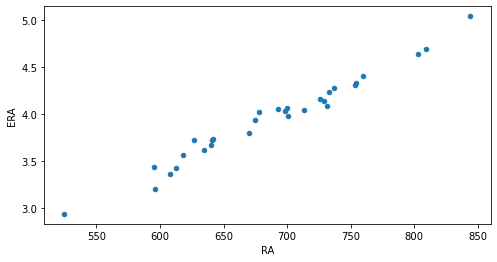

In [14]:
data.plot(kind='scatter', x='RA', y='ERA',figsize=(8,4))

<AxesSubplot:xlabel='RA', ylabel='ER'>

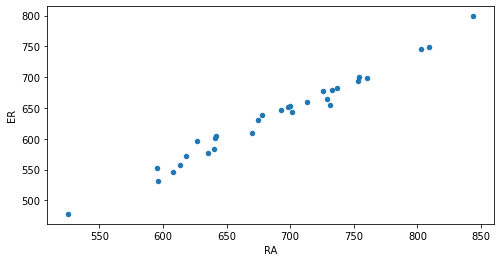

In [15]:
data.plot(kind='scatter', x='RA', y='ER',figsize=(8,4))

In both the case we get positively relation,means that they are equally dependent on each other

                                      Outliers

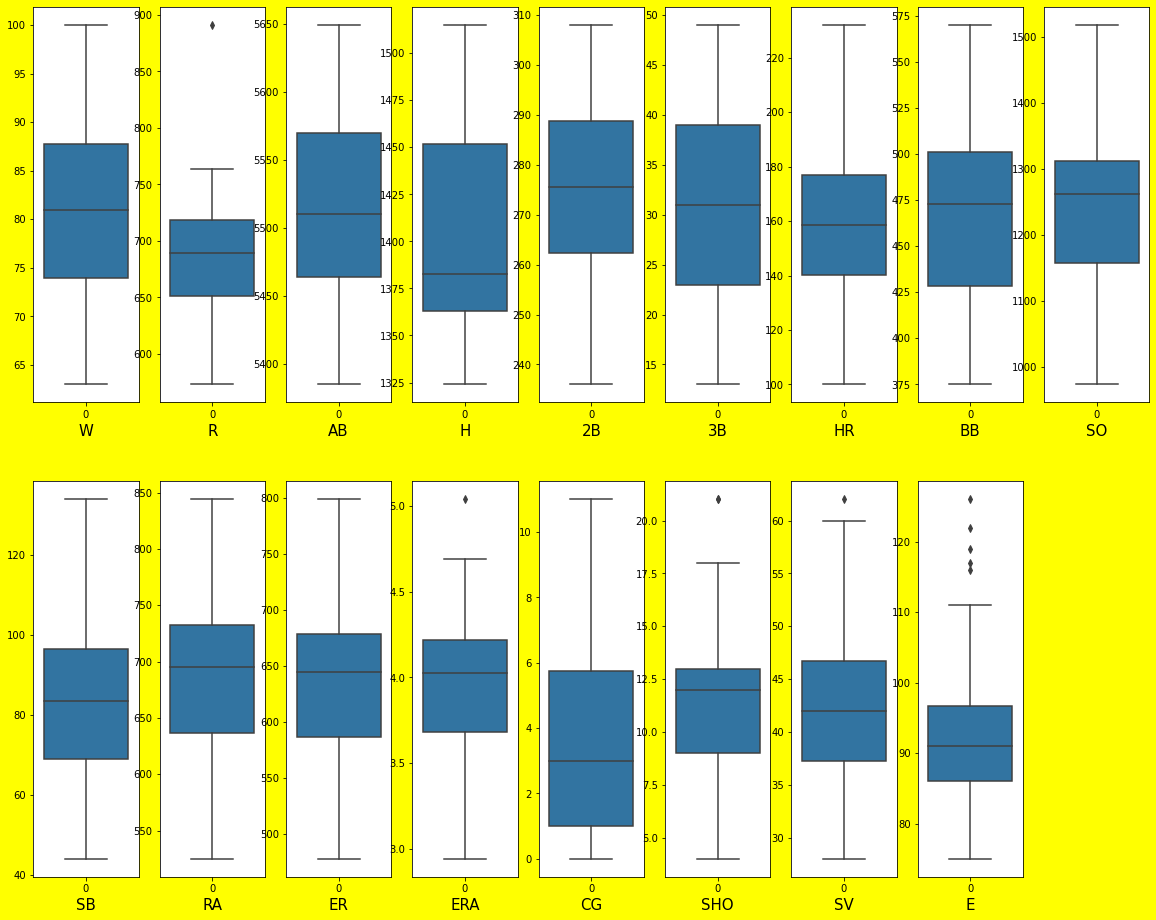

In [16]:
plt.figure(figsize=(20,16),facecolor='yellow')
number = 1

for column in data:
    if number <=17:
        plt.subplot(2,9,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers are present in some of the columns that are:
    
    * R
    * ERA
    * SHO
    * SV 
    * E

                                          SKEWNESS

In [17]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Take threshold range for skewness is (-0.5,0.5)

Skewness presents in the columns are:
    
    * R
    * H
    * HR
    * CG
    * SHO
    * SV
    * E

                                     VARIANCE INFLATION FACTOR

In [18]:
x=data.drop(['W'],axis=1)
y=data['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


There are eight colums having VIF greater than 5,so we drop the column alternatively who have highest VIF value. 
If in process more than four columns drop so we do not consider the vif take the whole columns dataset.

Here, ER column is drop having VIF=1680.387145

In [21]:
data=data.drop('ER',axis=1)

In [22]:
x=data.drop(['W'],axis=1)
y=data['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,11.158733,R
1,5.863764,AB
2,9.628749,H
3,3.786446,2B
4,3.293109,3B
5,9.057309,HR
6,3.791451,BB
7,2.607389,SO
8,1.849280,SB
9,122.133235,RA


Again,six columns having VIF greater than 5

Now,drop RA column having VIF=122.133235

In [23]:
data=data.drop('RA',axis=1)

In [24]:
x=data.drop(['W'],axis=1)
y=data['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,10.987898,R
1,4.399954,AB
2,8.941874,H
3,3.729413,2B
4,3.142717,3B
5,7.882841,HR
6,3.468244,BB
7,2.155496,SO
8,1.819823,SB
9,4.951981,ERA


Again,there are two columns having VIF greater than 5

So,we drop R column having VIF=10.987898

In [25]:
data=data.drop('R',axis=1)

In [26]:
x=data.drop(['W'],axis=1)
y=data['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.581051,AB
1,5.045576,H
2,3.142250,2B
3,2.850183,3B
4,1.901062,HR
5,2.767793,BB
6,1.963486,SO
7,1.694043,SB
8,4.511081,ERA
9,2.260786,CG


Again,one column H having VIF more than 5 ,so we remove that column 

In [29]:
data=data.drop('H',axis=1)

In [30]:
x=data.drop(['W'],axis=1)
y=data['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,2.059470,AB
1,2.717304,2B
2,2.847409,3B
3,1.875237,HR
4,2.718448,BB
5,1.598536,SO
6,1.546150,SB
7,4.282579,ERA
8,2.221676,CG
9,2.868025,SHO


After removing four columns we get VIF less than 5.
Now,there is no multicolinearity present is the dataset.

                                        REMOVEING OUTLIERS

In [31]:
x=data.drop(['W'],axis=1)
y=data_new['W']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


All the values are less than threshold value,it means that there is no outliers present in the dataset.
The points are locating in the boxplot that are not an outliers but are some other values.

                                        REMOVEING SKEWNESS 

In [34]:
data["HR"]=np.sqrt(data["HR"])
data["CG"]=np.sqrt(data["CG"])
data["SHO"]=np.sqrt(data["SHO"])
data["SV"]=np.sqrt(data["SV"])
data["E"]=np.sqrt(data["E"])

In [35]:
data.skew()

W      0.047089
AB     0.183437
2B    -0.230650
3B     0.129502
HR     0.264948
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.763487
dtype: float64

E still has skewness so,we drop that column from the dataset

In [36]:
data=data.drop(['E'],axis=1)

In [37]:
data.head()

,W,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV
0,95,5575,300,42,11.789826,383,973,104,3.73,1.414214,2.828427,7.483315
1,83,5467,277,44,12.489996,439,1264,70,4.07,1.414214,3.464102,6.708204
2,81,5439,303,29,11.874342,533,1157,86,3.67,3.316625,3.162278,6.164414
3,76,5533,260,27,11.661904,404,1231,68,3.98,2.645751,3.000000,6.082763
4,74,5605,289,49,12.288206,455,1259,83,4.64,2.645751,3.464102,5.916080


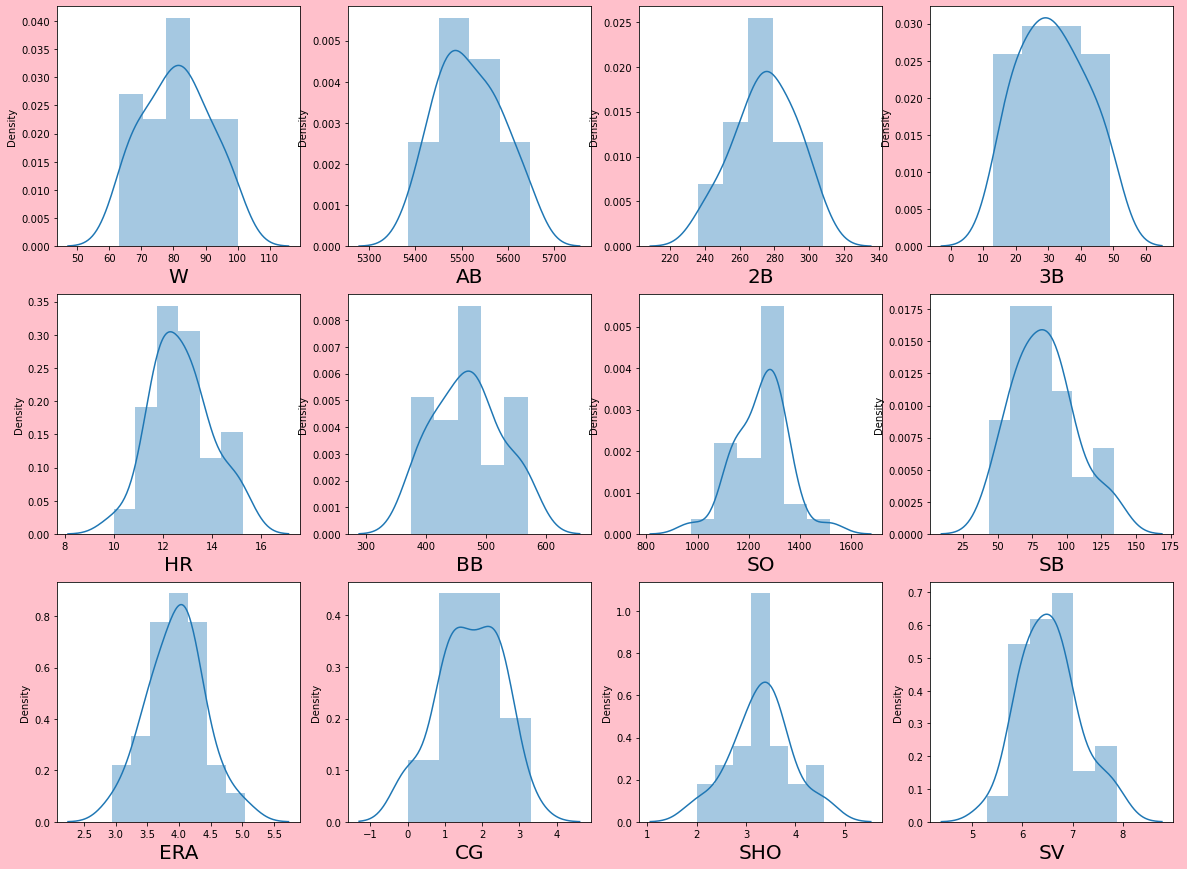

In [40]:
plt.figure(figsize=(20,15),facecolor ='pink')
num =1

for column in data:
    if num <=12:
        ax = plt.subplot(3,4,num)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

In [ ]:
Now,dataset is normally distributed

# MODEL TESTING

In [41]:
x=data_new.drop(['W'],axis=1)
y=data_new['W']

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                     Linear Regression                  

In [43]:
lr=LinearRegression()

In [44]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 96.0
Testing accuracy score: 58.8


random state 1
Training accuracy score: 96.4
Testing accuracy score: 62.1


random state 2
Training accuracy score: 97.0
Testing accuracy score: 25.5


random state 3
Training accuracy score: 96.4
Testing accuracy score: 55.7


random state 4
Training accuracy score: 95.6
Testing accuracy score: 61.3


random state 5
Training accuracy score: 94.5
Testing accuracy score: 80.1


random state 6
Training accuracy score: 94.9
Testing accuracy score: 79.3


random state 7
Training accuracy score: 94.6
Testing accuracy score: 71.0


random state 8
Training accuracy score: 95.0
Testing accuracy score: 83.5


random state 9
Training accuracy score: 95.2
Testing accuracy score: 74.1


random state 10
Training accuracy score: 95.3
Testing accuracy score: 60.1


random state 11
Training accuracy score: 97.1
Testing accuracy score: 8.0


random state 12
Training accuracy score: 96.9
Testing accuracy score: -35.2


random st

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =27)

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 91.3223911864691


In [48]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -2.6188093018046232


At cross fold 3 the cv score is 0.48270606625238804


At cross fold 4 the cv score is 0.612642369755926


At cross fold 5 the cv score is 0.15610281741419468


At cross fold 6 the cv score is 0.3806017173734751


At cross fold 7 the cv score is 0.30378539760633194


At cross fold 8 the cv score is 0.3141365896743329


At cross fold 9 the cv score is -4.850888126871694




In [49]:
lrscore=cross_val_score(lr,x_scaled,y,cv=4)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 61.2642369755926


In [50]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 2.2434480018425518
Mean square error: 7.850825529352811
Root mean square error: 2.8019324633818017


                                      Decision Tree Regressor

In [51]:
dtr=DecisionTreeRegressor()

In [52]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: -99.8


random state 1
Training accuracy score: 100.0
Testing accuracy score: 45.3


random state 2
Training accuracy score: 100.0
Testing accuracy score: 34.6


random state 3
Training accuracy score: 100.0
Testing accuracy score: 45.0


random state 4
Training accuracy score: 100.0
Testing accuracy score: -8.4


random state 5
Training accuracy score: 100.0
Testing accuracy score: 35.1


random state 6
Training accuracy score: 100.0
Testing accuracy score: 13.9


random state 7
Training accuracy score: 100.0
Testing accuracy score: -44.8


random state 8
Training accuracy score: 100.0
Testing accuracy score: 11.0


random state 9
Training accuracy score: 100.0
Testing accuracy score: -180.4


random state 10
Training accuracy score: 100.0
Testing accuracy score: -71.5


random state 11
Training accuracy score: 100.0
Testing accuracy score: -31.1


random state 12
Training accuracy score: 100.0
Testing accuracy scor

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =67)

In [54]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 64.40191387559808


In [56]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.9134922049386155


At cross fold 3 the cv score is -0.4056538818986304


At cross fold 4 the cv score is -0.2928693211637206


At cross fold 5 the cv score is -1.8161986990624008


At cross fold 6 the cv score is -0.6346141123319585


At cross fold 7 the cv score is -1.142099906604667


At cross fold 8 the cv score is -1.4028879141831394


At cross fold 9 the cv score is -12.276902667803899




In [57]:
dtrscore=cross_val_score(dtr,x_scaled,y,cv=2)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: -74.48546879262457


In [58]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 6.666666666666667
Mean square error: 51.666666666666664
Root mean square error: 7.187952884282608


                                   Random Forest Regressor

In [60]:
rfr=RandomForestRegressor()

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 92.6
Testing accuracy score: 31.3


random state 1
Training accuracy score: 92.3
Testing accuracy score: 53.7


random state 2
Training accuracy score: 93.0
Testing accuracy score: 49.1


random state 3
Training accuracy score: 94.3
Testing accuracy score: 53.6


random state 4
Training accuracy score: 91.9
Testing accuracy score: 48.2


random state 5
Training accuracy score: 93.2
Testing accuracy score: 65.4


random state 6
Training accuracy score: 91.3
Testing accuracy score: 59.2


random state 7
Training accuracy score: 93.9
Testing accuracy score: -18.2


random state 8
Training accuracy score: 90.1
Testing accuracy score: 55.3


random state 9
Training accuracy score: 94.9
Testing accuracy score: 24.1


random state 10
Training accuracy score: 94.9
Testing accuracy score: -0.8


random state 11
Training accuracy score: 93.7
Testing accuracy score: 43.3


random state 12
Training accuracy score: 94.0
Testing accuracy score: 5.2


random st

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =29)

In [63]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 75.79009292035394


In [64]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.2679859258799631


At cross fold 3 the cv score is 0.37919544222837026


At cross fold 4 the cv score is 0.37844163050158247


At cross fold 5 the cv score is -0.7550103173540459


At cross fold 6 the cv score is 0.22794631811364985


At cross fold 7 the cv score is -0.037313779679637324


At cross fold 8 the cv score is -0.2773553575342439


At cross fold 9 the cv score is -12.315785857981005




In [65]:
rfrscore=cross_val_score(rfr,x_scaled,y,cv=3)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 46.376400428500894


In [66]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 3.928333333333337
Mean square error: 30.396883333333367
Root mean square error: 5.513336860135917


                                       Ada Boost Regressor

In [67]:
ada= AdaBoostRegressor()

In [68]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 98.8
Testing accuracy score: -4.4


random state 1
Training accuracy score: 98.7
Testing accuracy score: 70.3


random state 2
Training accuracy score: 99.3
Testing accuracy score: 40.4


random state 3
Training accuracy score: 99.5
Testing accuracy score: 61.4


random state 4
Training accuracy score: 98.7
Testing accuracy score: 2.6


random state 5
Training accuracy score: 98.9
Testing accuracy score: 53.6


random state 6
Training accuracy score: 98.4
Testing accuracy score: 55.5


random state 7
Training accuracy score: 98.9
Testing accuracy score: 5.3


random state 8
Training accuracy score: 98.9
Testing accuracy score: 57.2


random state 9
Training accuracy score: 98.2
Testing accuracy score: 17.1


random state 10
Training accuracy score: 98.8
Testing accuracy score: 18.0


random state 11
Training accuracy score: 99.1
Testing accuracy score: -8.5


random state 12
Training accuracy score: 98.9
Testing accuracy score: 13.2


random stat

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 54)

In [70]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [71]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

R2 score: 78.91804617530465


In [72]:
for j in range(2,10):
    cv_score=cross_val_score(ada,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.5727578629925897


At cross fold 3 the cv score is 0.3590913807098081


At cross fold 4 the cv score is 0.49316931782835494


At cross fold 5 the cv score is -0.767986090765463


At cross fold 6 the cv score is 0.11800964210725223


At cross fold 7 the cv score is -0.14161890179718256


At cross fold 8 the cv score is -0.24439041007827556


At cross fold 9 the cv score is -14.339583316481253




In [73]:
adascore=cross_val_score(ada,x_scaled,y,cv=4)
adac=adascore.mean()
print('cross val score:',adac*100)

cross val score: 47.595462914499436


In [74]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 4.173809523809524
Mean square error: 26.047925170068027
Root mean square error: 5.103716799555793


                                          Gradient Boosting Regressor

In [75]:
gb= GradientBoostingRegressor()

In [76]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: -17.1


random state 1
Training accuracy score: 100.0
Testing accuracy score: 56.0


random state 2
Training accuracy score: 100.0
Testing accuracy score: 39.0


random state 3
Training accuracy score: 100.0
Testing accuracy score: 38.9


random state 4
Training accuracy score: 100.0
Testing accuracy score: 11.5


random state 5
Training accuracy score: 100.0
Testing accuracy score: 61.3


random state 6
Training accuracy score: 100.0
Testing accuracy score: 57.1


random state 7
Training accuracy score: 100.0
Testing accuracy score: 13.6


random state 8
Training accuracy score: 100.0
Testing accuracy score: 44.8


random state 9
Training accuracy score: 100.0
Testing accuracy score: -11.5


random state 10
Training accuracy score: 100.0
Testing accuracy score: -143.8


random state 11
Training accuracy score: 100.0
Testing accuracy score: 29.1


random state 12
Training accuracy score: 100.0
Testing accuracy score:

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 99)

In [78]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [79]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 78.48216295299089


In [80]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.6068744872791639


At cross fold 3 the cv score is 0.29946647212567346


At cross fold 4 the cv score is 0.30091409836189953


At cross fold 5 the cv score is -1.211611659616609


At cross fold 6 the cv score is 0.018973585826047745


At cross fold 7 the cv score is -0.3935931784715603


At cross fold 8 the cv score is -0.923394094546114


At cross fold 9 the cv score is -8.756701742655997




In [81]:
gbscore=cross_val_score(gb,x_scaled,y,cv=4)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 32.00352557119016


In [82]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 4.232232463364785
Mean square error: 29.150692021739857
Root mean square error: 5.399138081373716


The r2_score and cross_validation_score of the regression models are:
    
    * Linear Regression
            r2_score = 91.32
            cv_score = 61.26
            
    * Decision Tree Regressor
            r2_score = 64.40
            cv_score =-74.48
            
    * Random Forest Regressor
            r2_score = 75.59
            cv_score = 46.37
            
    * Ada Boost Regressor
            r2_score = 78.92
            cv_score = 47.59
            
    * Gradient Boosting Regressor
            r2_score = 78.48
            cv_score = 32.00
 
 Linear Regression has better accuracy from all of the model and have least mean square error also,so we select that model.

# MODELING OF LINEAR REGRESSION

                                    REGULARIZATION

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10,100],
              'max_iter':range(0,100),
              'random_state':range(0,10),
              'normalize':[True,False]}

In [85]:
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'max_iter': 99, 'normalize': False, 'random_state': 0}


In [86]:
ls=Lasso(alpha=1,max_iter=99,normalize=False,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss = r2_score(y_test,pred_ls)*100
print("r2_score",lss)

cv_score=cross_val_score(ls,x_scaled,y,cv=2)
cv_mean=cv_score.mean()*100
print("cv_score",cv_mean)

r2_score 92.2501051206183
cv_score 44.021652181504415


In [ ]:
r2_score of Linear Regression model is 91.32 and after apply regularization technique we get the value of r2_score is 92.25
There is some increment in the score.

                               Plot a graph b/w actual and predicted value

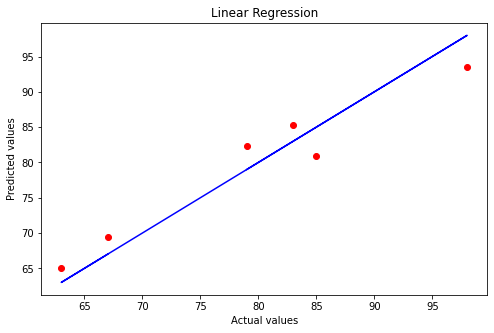

In [88]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_ls,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')                                                                                
plt.show()

There is not much difference in the actual value and the predicted value.

                                       SAVE THE MODEL

In [92]:
filename='Baseball_Case_Study.pkl'
pickle.dump(ls,open(filename,'wb'))

In [93]:
loaded_model= pickle.load(open('Baseball_Case_Study.pkl','rb'))
result= loaded_model.score(x_test,y_test)
print(result)

0.922501051206183


                                           CONCLUSION

In [99]:
Prediction=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted value","Actual value"])
Prediction

,0,1,2,3,4,5
Predicted value,69.449656,65.063844,93.547839,80.912959,85.326908,82.285319
Actual value,67.000000,63.000000,98.000000,85.000000,83.000000,79.000000
